# **Predict Optimum Numbers of Cluster using Iris datasets**
## Task 2
## Name : Soumit Kar

# The Sparks Foundation

In [1]:
# Importing libraries in Python
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Loading the iris dataset
df=pd.read_csv('/content/Iris.csv')

In [3]:
#drop the id columns
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#check null value
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

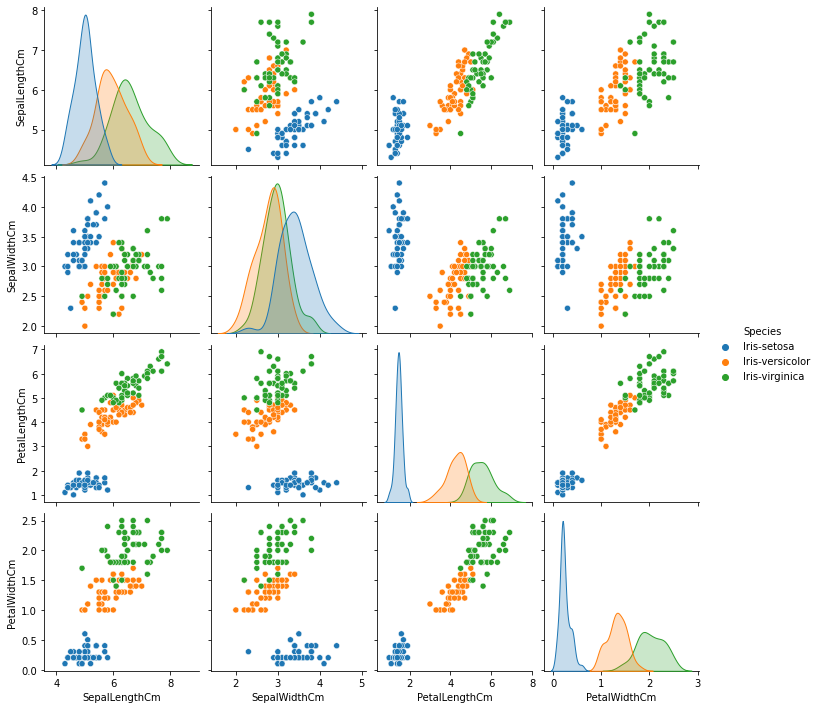

In [9]:
sns.pairplot(df, hue = 'Species')

[]

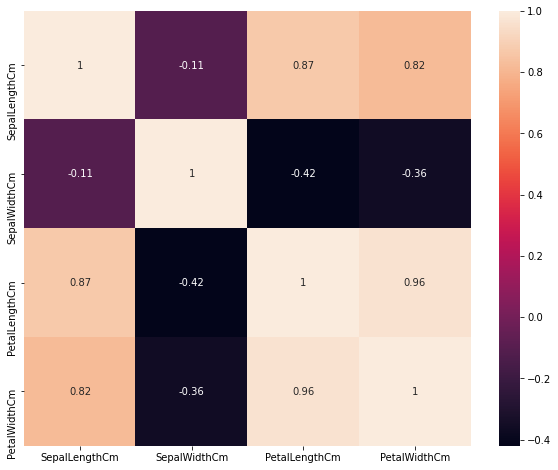

In [10]:
#Now we will see how these features are correlated to each 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Sepal Length and Sepal Width features are slightly correlated with each other.

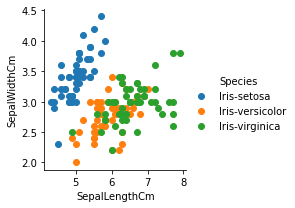

In [11]:
#Scatter plot------------ Sepal Length and Width 
sns.FacetGrid(df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

Observations:

1 -Using sepal length and sepal width features, we can distinguish Setosa flowers from others.

2 -Separating versicolor and virginica much harder as they overlapped.

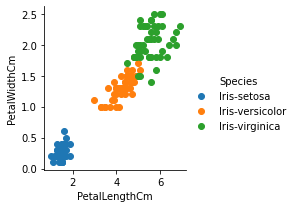

In [12]:
#Scatter plot-------------Petal Length and Width
sns.FacetGrid(df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

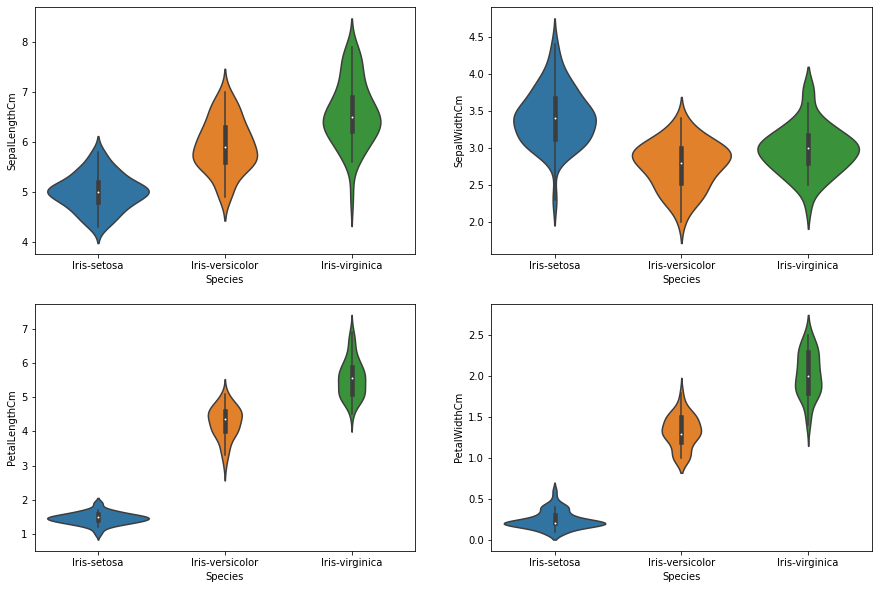

In [13]:
#Violin Plot. The violinplot shows density of the length and width in the species. 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)

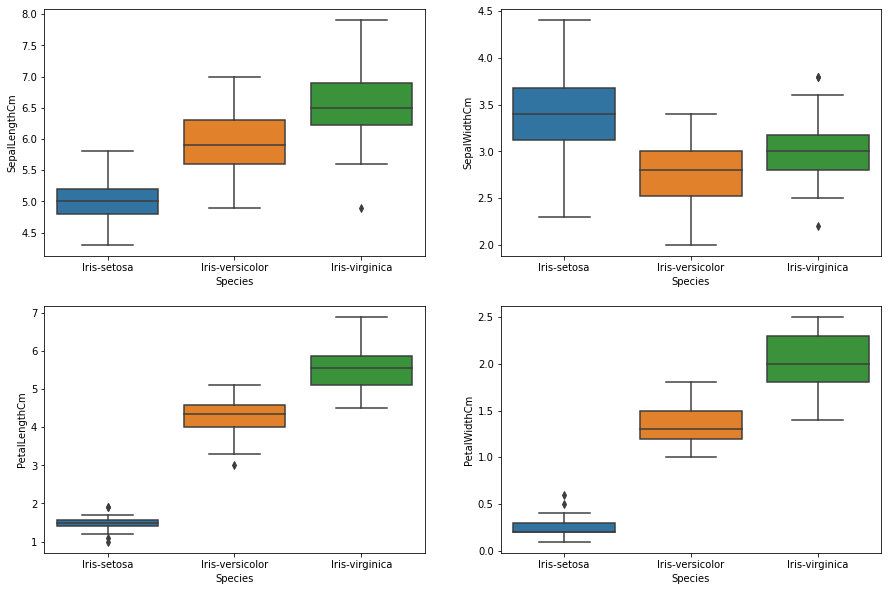

In [14]:
#Box plot for distribution of target variable wrt all independent variables
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)


In [15]:
#categorical columns to numerical columns.
def Spec(s):
  if s == 'Iris-setosa':
    return 0
  elif s == 'Iris-versicolor':
    return 1
  else:
    return 2

df.Species =  df.Species.apply(lambda x: Spec(x))     


In [16]:
#Train test split
X= df.iloc[:,0:4]
y = df.iloc[:,4:5]

In [17]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.318753220611924,
 29.954086421037225,
 27.992635739389613,
 25.94725937001595]

Elbow Method for Optimum Cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


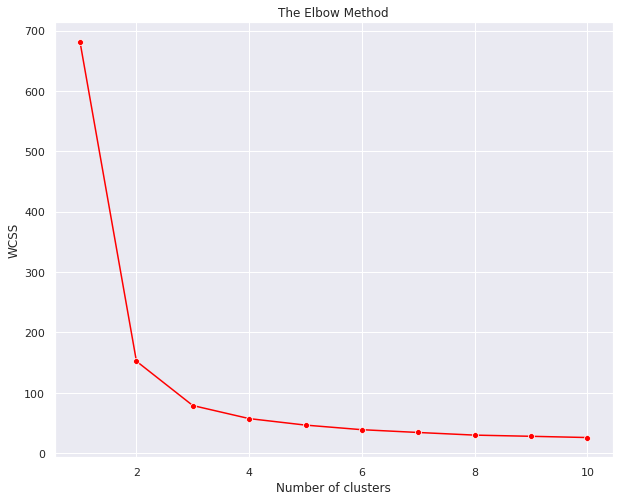

In [19]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum value for K would be 3.

With an increase in the number of clusters the WCSS value decreases.

We can see that after 3 the drop in wcss is minimal.

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(X)

Visualisation

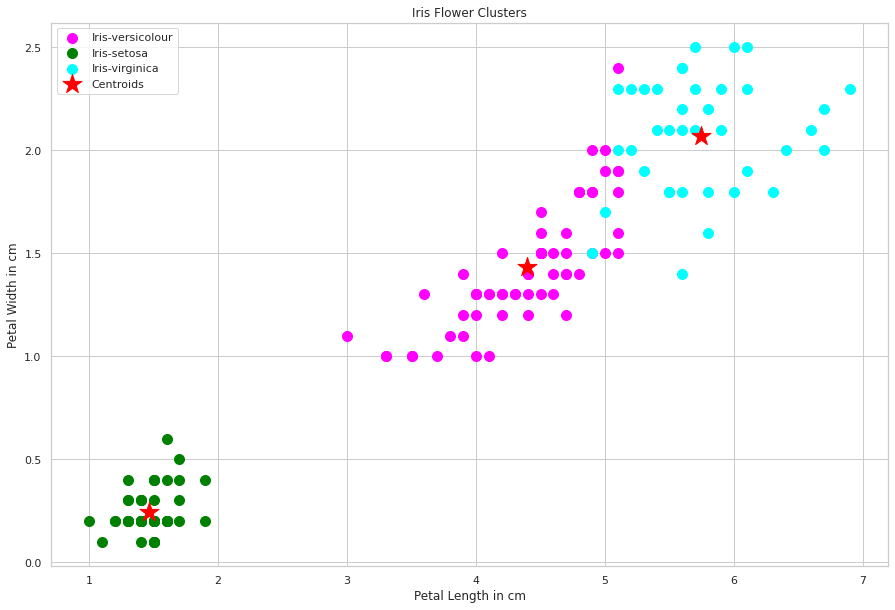

In [21]:
fig = plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(X.values[y_kmeans == 0, 2], X.values[y_kmeans == 0, 3], s = 100, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X.values[y_kmeans == 1, 2], X.values[y_kmeans == 1, 3], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(X.values[y_kmeans == 2, 2], X.values[y_kmeans == 2, 3],s = 100, c = 'cyan', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 400, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()